In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pickle
import joblib

Coefficients: 
 [ 3.03499549e-01 -2.37639315e+02  5.10530605e+02  3.27736980e+02
 -8.14131709e+02  4.92814588e+02  1.02848452e+02  1.84606489e+02
  7.43519617e+02  7.60951722e+01]
Mean squared error: 2004.57
Coefficient of determination: 0.59


ValueError: x and y must be the same size

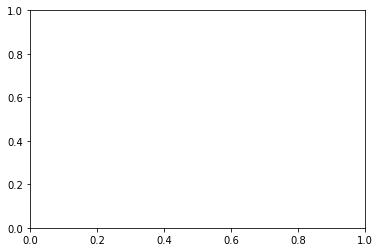

In [2]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()


# Saving as a Pickle file

In [7]:
with open('diabetes_model.pkl', 'wb') as files:
    pickle.dump(regr, files)

# Dash plotly

In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.graph_objs as go

In [ ]:
import base64
import datetime
import io

import dash
from dash.dependencies import Input, Output, State
import dash_core_components as dcc
import dash_html_components as html
import dash_table

import pandas as pd

training_data = joblib.load("C:/Users/Prashant/Documents/Bizmetric/Iris RShiny App/training_data.pkl")
training_labels = joblib.load("C:/Users/Prashant/Documents/Bizmetric/Iris RShiny App/training_labels.pkl")



external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

#app.layout = html.Div([
app.layout = html.Div(children=[
    html.H1(children='Diabetes Prediction '),

    html.Div(children='''
        Dash: A web application framework for your data.
    '''),
    dcc.Upload(
        id='upload-data',
        children=html.Div([
            'Drag and Drop or ',
            html.A('Select Files')
        ]),
        style={
            'width': '20%',
            'height': '60px',
            'lineHeight': '60px',
            'borderWidth': '1px',
            'borderStyle': 'dashed',
            'borderRadius': '5px',
            'textAlign': 'center',
            'margin': '10px'
        },
        # Allow multiple files to be uploaded
        multiple=True
    ),
    html.Div(id='output-data-upload'),
])

def parse_contents(contents, filename, date):
    content_type, content_string = contents.split(',')

    decoded = base64.b64decode(content_string)
    try:
        if 'csv' in filename:
            # Assume that the user uploaded a CSV file
            df = pd.read_csv(
                io.StringIO(decoded.decode('utf-8')))
        elif 'xls' in filename:
            # Assume that the user uploaded an excel file
            df = pd.read_excel(io.BytesIO(decoded))
    except Exception as e:
        print(e)
        return html.Div([
            'There was an error processing this file.'
        ])

    return html.Div([
        html.H5(filename),
        html.H6(datetime.datetime.fromtimestamp(date)),

        dash_table.DataTable(
            data=df.to_dict('records'),
            columns=[{'name': i, 'id': i} for i in df.columns]
        ),

        html.Hr(),  # horizontal line

        # For debugging, display the raw contents provided by the web browser
        html.Div('Raw Content'),
        html.Pre(contents[0:200] + '...', style={
            'whiteSpace': 'pre-wrap',
            'wordBreak': 'break-all'
        })
    ])

@app.callback(Output('output-data-upload', 'children'),
              Input('upload-data', 'contents'),
              State('upload-data', 'filename'),
              State('upload-data', 'last_modified'))
def update_output(list_of_contents, list_of_names, list_of_dates):
    if list_of_contents is not None:
        children = [
            parse_contents(c, n, d) for c, n, d in
            zip(list_of_contents, list_of_names, list_of_dates)]
        return children

if __name__ == '__main__':
    
    with open('diabetes_model_pkl', 'rb') as f: 
        my_list = pickle.load(f)
    app.run_server()

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [20/Oct/2021 17:44:23] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [20/Oct/2021 17:44:25] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [20/Oct/2021 17:44:25] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [20/Oct/2021 17:44:25] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [20/Oct/2021 17:48:42] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [20/Oct/2021 17:48:42] "GET /_dash-component-suites/dash_table/async-highlight.js HTTP/1.1" 200 -
127.0.0.1 - - [20/Oct/2021 17:48:42] "GET /_dash-component-suites/dash_table/async-table.js HTTP/1.1" 200 -


In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn import linear_model, tree, neighbors

df = px.data.tips()
X = df.total_bill.values[:, None]
X_train, X_test, y_train, y_test = train_test_split(
    X, df.tip, random_state=42)

models = {'Regression': linear_model.LinearRegression,
          'Decision Tree': tree.DecisionTreeRegressor,
          'k-NN': neighbors.KNeighborsRegressor}

app = dash.Dash(__name__)

app.layout = html.Div([
    html.P("Select Model:"),
    dcc.Dropdown(
        id='model-name',
        options=[{'label': x, 'value': x} 
                 for x in models],
        value='Regression',
        clearable=False
    ),
    dcc.Graph(id="graph"),
])

@app.callback(
    Output("graph", "figure"), 
    [Input('model-name', "value")])
def train_and_display(name):
    model = models[name]()
    model.fit(X_train, y_train)

    x_range = np.linspace(X.min(), X.max(), 100)
    y_range = model.predict(x_range.reshape(-1, 1))

    fig = go.Figure([
        go.Scatter(x=X_train.squeeze(), y=y_train, 
                   name='train', mode='markers'),
        go.Scatter(x=X_test.squeeze(), y=y_test, 
                   name='test', mode='markers'),
        go.Scatter(x=x_range, y=y_range, 
                   name='prediction')
    ])

    return fig


if __name__ == '__main__':
    
    with open('diabetes_model_pkl', 'rb') as f: 
        my_list = pickle.load(f)
    app.run_server()

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [20/Oct/2021 17:43:45] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [20/Oct/2021 17:43:45] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [20/Oct/2021 17:43:45] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [20/Oct/2021 17:43:45] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [20/Oct/2021 17:43:57] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [20/Oct/2021 17:43:58] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [20/Oct/2021 17:43:58] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [20/Oct/2021 17:43:58] "POST /_dash-update-component HTTP/1.1" 200 -


In [ ]:
app = dash.Dash()

training_data = joblib.load("C:/Users/Prashant/Documents/Bizmetric/Iris RShiny App/training_data.pkl")
training_labels = joblib.load("C:/Users/Prashant/Documents/Bizmetric/Iris RShiny App/training_labels.pkl")

ALLOWED_TYPES = (
    "text", "number", "password", "email", "search",
    "tel", "url", "range", "hidden",
)


app.layout = html.Div(
    [
        dcc.Input(
            id="input_{}".format(_),
            type=_,
            placeholder="input type {}".format(_),
        )
        for _ in ALLOWED_TYPES
    ]
    + [html.Div(id="out-all-types")]
)


@app.callback(
    Output("out-all-types", "children"),
    [Input("input_{}".format(_), "value") for _ in ALLOWED_TYPES],
)
def cb_render(*vals):
    return " | ".join((str(val) for val in vals if val))


In [ ]:
app = dash.Dash()

training_data = joblib.load("C:/Users/Prashant/Documents/Bizmetric/Iris RShiny App/training_data.pkl")
training_labels = joblib.load("C:/Users/Prashant/Documents/Bizmetric/Iris RShiny App/training_labels.pkl")


app.layout = html.Div(children=[
    html.H1(children='Simple Logistic Regression', style={'textAlign': 'center'}),

    html.Div(children=[
        html.Label('Enter glucose: '),
        dcc.Input(id='glucose', placeholder='glucose', type='text'),
        html.Div(id='result')
    ], style={'textAlign': 'center'}),

   
])


@app.callback(
    Output(component_id='result', component_property='children'),
    [Input(component_id='glucose', component_property='value')])
def update_df(glucose):
    if glucose is not None and glucose is not '':
        try:
            pred = model.predict(float(glucose))[0]
            return 'With {} glucose you should have {} diabetes'.format(glucose, pred[0])
        except ValueError:
            return 'Unable to give years of experience'


In [ ]:
if __name__ == '__main__':
    
    with open('diabetes_model_pkl', 'rb') as f: 
        my_list = pickle.load(f)
    app.run_server()

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [20/Oct/2021 17:27:23] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [20/Oct/2021 17:27:25] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [20/Oct/2021 17:27:25] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [20/Oct/2021 17:27:25] "POST /_dash-update-component HTTP/1.1" 200 -
